In [1230]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [1231]:
df = pd.read_csv("owid-covid-data.csv")
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150390,ZWE,Africa,Zimbabwe,2021-12-23,201344.0,1940.0,2755.286,4855.0,27.0,13.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
150391,ZWE,Africa,Zimbabwe,2021-12-24,202736.0,1392.0,1881.286,4871.0,16.0,13.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
150392,ZWE,Africa,Zimbabwe,2021-12-25,203746.0,1010.0,2025.571,4885.0,14.0,15.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
150393,ZWE,Africa,Zimbabwe,2021-12-26,204351.0,605.0,1811.143,4891.0,6.0,15.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [1232]:
df = df.fillna(0) 
df_group = df[df['date']<="2021-12-23"]
df_group1 = df_group.groupby(['date'])['total_deaths'].sum().reset_index()
df_group1

,date,total_deaths
0,2020-01-01,0.0
1,2020-01-02,0.0
2,2020-01-03,0.0
3,2020-01-04,0.0
4,2020-01-05,0.0
...,...,...
718,2021-12-19,22301937.0
719,2021-12-20,22331281.0
720,2021-12-21,22364006.0
721,2021-12-22,22398423.0


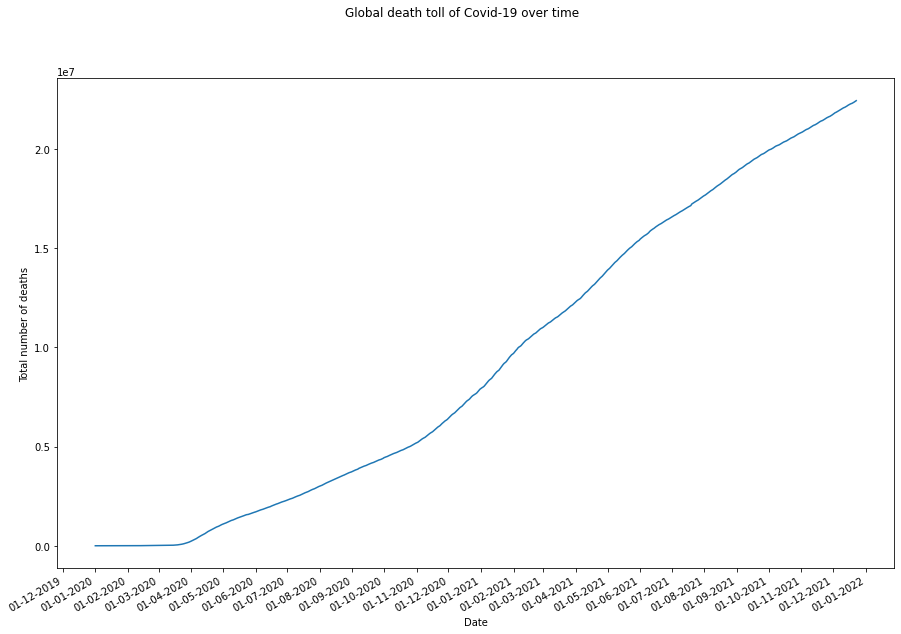

In [1233]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df_group1['date'] = pd.to_datetime(df_group1['date'])
plt.figure(figsize=(15,10))
plt.plot(df_group1['date'], df_group1['total_deaths'])
ax = plt.gca()
ax.set_xlabel("Date")
ax.set_ylabel("Total number of deaths")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gcf().autofmt_xdate()
plt.suptitle("Global death toll of Covid-19 over time")
plt.show()


In [1234]:
import datetime as dt
df_group1['date'] = pd.to_datetime(df_group1['date'])
df_group1['date'] = df_group1['date'].map(dt.datetime.toordinal)

In [1235]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
X = df_group1[['date']]
y = np.asarray(df_group1['total_deaths'])
reg.fit(X, y)
slope = reg.coef_
intercept = reg.intercept_
print(reg.coef_)
print(reg.intercept_)
df_group1['predict'] = reg.predict(X)
df_group1

[35285.41124249]
-26023839533.218044


,date,total_deaths,predict
0,737425,0.0,-3.495148e+06
1,737426,0.0,-3.459862e+06
2,737427,0.0,-3.424577e+06
3,737428,0.0,-3.389291e+06
4,737429,0.0,-3.354006e+06
...,...,...,...
718,738143,22301937.0,2.183978e+07
719,738144,22331281.0,2.187506e+07
720,738145,22364006.0,2.191035e+07
721,738146,22398423.0,2.194563e+07


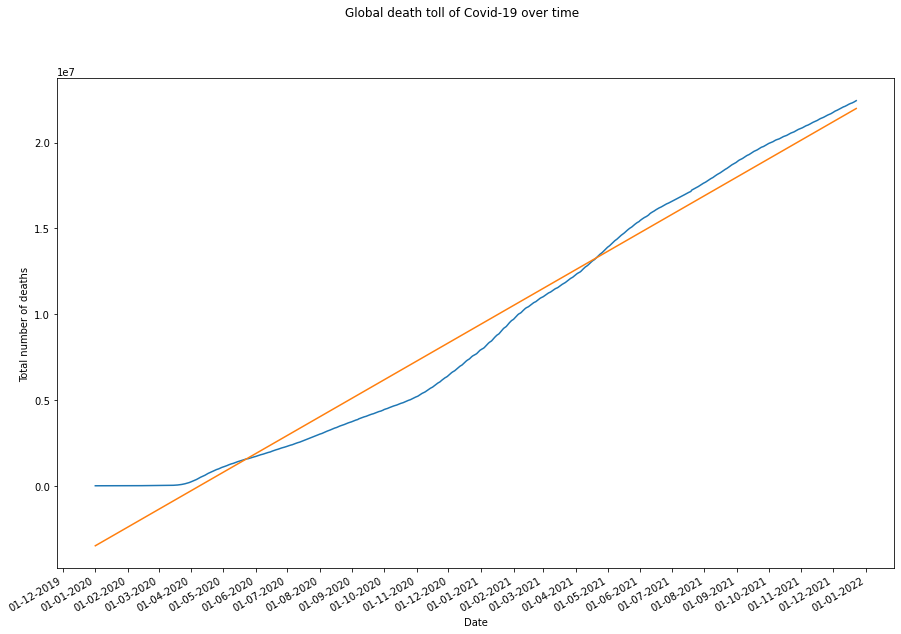

In [1236]:
df_group1['date'] = df_group1['date'].apply(dt.datetime.fromordinal)
plt.figure(figsize=(15,10))
plt.plot(df_group1['date'], df_group1['total_deaths'])
plt.plot(df_group1['date'], df_group1['predict'])
ax = plt.gca()
ax.set_xlabel("Date")
ax.set_ylabel("Total number of deaths")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gcf().autofmt_xdate()
plt.suptitle("Global death toll of Covid-19 over time")
plt.show()

In [1237]:
from sklearn.metrics import mean_squared_error

val1 = mean_squared_error(df_group1['predict'], df_group1['total_deaths'])
val1

1484563130346.7493

In [1238]:
df_sko_tr = df[(df['date'] >= "2021-09-01") & (df['date'] <= "2021-11-22") & (df['iso_code'] == "KOR")]
df_sko_te = df[(df['date'] >= "2021-11-23") & (df['date'] <= "2021-11-29") & (df['iso_code'] == "KOR")]
df_sko_tr1 = df_sko_tr.groupby(['date'])['total_deaths'].sum().reset_index()
df_sko_te1 = df_sko_te.groupby(['date'])['total_deaths'].sum().reset_index()

In [1239]:
for dataset in [df_sko_tr, df_sko_te]:
    dataset.drop(columns=["iso_code", "continent", "location",'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'population',	'population_density',	'median_age',	'aged_65_older',	'aged_70_older',	'gdp_per_capita',	'extreme_poverty', 'cardiovasc_death_rate',	'diabetes_prevalence',	'female_smokers',	'male_smokers',	'handwashing_facilities',	'hospital_beds_per_thousand',	'life_expectancy',	'human_development_index','tests_units'], inplace=True)
    dataset['date'] = pd.to_datetime(dataset['date'])
    dataset['date'] = dataset['date'].map(dt.datetime.toordinal)

/Users/sarthak/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/var/folders/4b/y_sx2hgd4sndx3kdqd2y0p540000gn/T/ipykernel_3057/3744032552.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['date'] = pd.to_datetime(dataset['date'])
/var/folders/4b/y_sx2hgd4sndx3kdqd2y0p540000gn/T/ipykernel_3057/3744032552.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [1240]:
df_sko_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 126650 to 126732
Data columns (total 40 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        83 non-null     int64  
 1   total_cases                                 83 non-null     float64
 2   new_cases                                   83 non-null     float64
 3   new_cases_smoothed                          83 non-null     float64
 4   total_deaths                                83 non-null     float64
 5   new_deaths                                  83 non-null     float64
 6   new_deaths_smoothed                         83 non-null     float64
 7   total_cases_per_million                     83 non-null     float64
 8   new_cases_per_million                       83 non-null     float64
 9   new_cases_smoothed_per_million              83 non-null     float64
 10  total_d

In [1241]:
# corr = df_sko_tr.corr()
# corr.style.background_gradient(cmap='coolwarm')

In [1242]:
from sklearn.linear_model import BayesianRidge, LinearRegression

reg = linear_model.LinearRegression()
# y = np.asarray(df_sko_tr['total_deaths'])
y = df_sko_tr['total_deaths']
X = df_sko_tr.drop(columns=["total_deaths"])
reg.fit(X, y)
slope = reg.coef_
intercept = reg.intercept_
print(reg.coef_)
print(reg.intercept_)

# y2 = np.asarray(df_sko_te['total_deaths'])
y2 = df_sko_te['total_deaths']
X2 = df_sko_te.drop(columns=["total_deaths"])
df_sko_te['predict'] = reg.predict(X2)
df_group1

[-1.88945553e-03 -2.26021899e-01  2.34155510e-01 -4.11261348e-02
  1.47652148e-01 -2.54116379e-01  1.15957659e+01 -1.20127937e+01
  2.11135591e+00  5.13141702e+01 -7.58016325e+00  1.30310227e+01
 -2.80931265e-02 -6.26351081e-05  9.25448041e-05 -4.74800916e+00
  3.19940119e+00 -2.93930346e-04  1.50744874e+01  2.48155734e-01
  2.02638830e-04 -2.53353352e-07 -3.04742074e-07  3.00862789e-07
  2.83000536e-06 -1.43383475e-08 -1.35042534e-04  3.48416947e-01
 -5.11636878e-02 -3.60121320e-01 -1.61587579e+00  6.92565116e-03
 -1.94005400e-06  9.83875759e-01  6.99284799e-05 -9.05355127e-05
  4.99550866e-01 -4.75176896e-04 -4.94074828e-06]
1395.2196774572108


/var/folders/4b/y_sx2hgd4sndx3kdqd2y0p540000gn/T/ipykernel_3057/1439403400.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sko_te['predict'] = reg.predict(X2)


,date,total_deaths,predict
0,2020-01-01,0.0,-3.495148e+06
1,2020-01-02,0.0,-3.459862e+06
2,2020-01-03,0.0,-3.424577e+06
3,2020-01-04,0.0,-3.389291e+06
4,2020-01-05,0.0,-3.354006e+06
...,...,...,...
718,2021-12-19,22301937.0,2.183978e+07
719,2021-12-20,22331281.0,2.187506e+07
720,2021-12-21,22364006.0,2.191035e+07
721,2021-12-22,22398423.0,2.194563e+07


In [1243]:
X.shape

(83, 39)

In [1244]:
val1 = mean_squared_error(df_sko_te['predict'], df_sko_te['total_deaths'])
val1

0.001033627031715247

/var/folders/4b/y_sx2hgd4sndx3kdqd2y0p540000gn/T/ipykernel_3057/2666332850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sko_te['date'] = df_sko_te['date'].apply(dt.datetime.fromordinal)


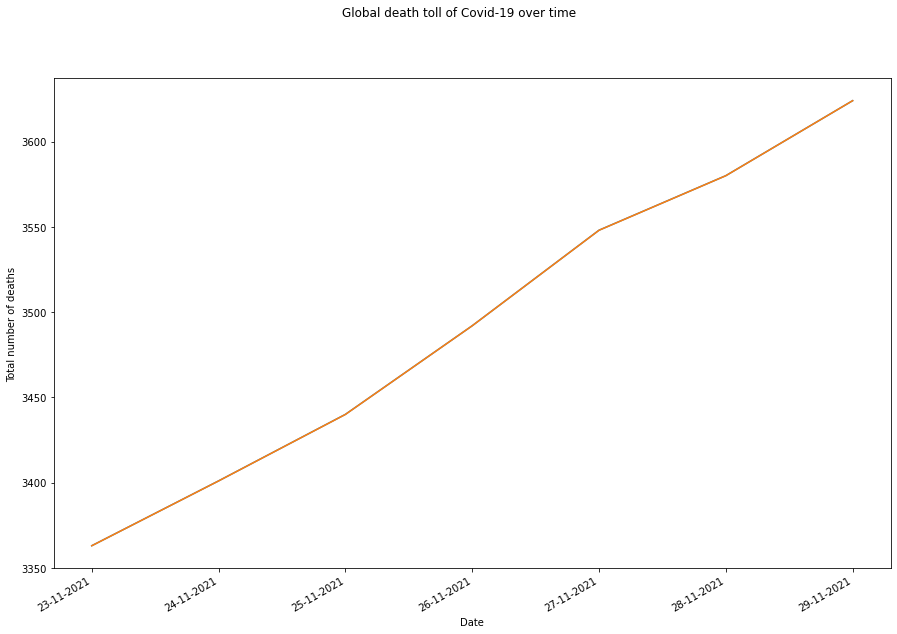

In [1245]:
df_sko_te['date'] = df_sko_te['date'].apply(dt.datetime.fromordinal)
plt.figure(figsize=(15,10))
plt.plot(df_sko_te['date'], df_sko_te['predict'])
plt.plot(df_sko_te['date'], df_sko_te['total_deaths'])
ax = plt.gca()
ax.set_xlabel("Date")
ax.set_ylabel("Total number of deaths")
# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gcf().autofmt_xdate()
plt.suptitle("Global death toll of Covid-19 over time")
plt.show()

In [1246]:
for dataset in [df_sko_tr1, df_sko_te1]:
    dataset['date'] = pd.to_datetime(dataset['date'])
    dataset['date'] = dataset['date'].map(dt.datetime.toordinal)
    # dataset['date'] = (dataset['date'] - dataset['date'].min()) / (dataset['date'].max() - dataset['date'].min())
    dataset['date0']= pd.qcut(dataset['date'],10,labels=np.arange(10)).astype(int)

    for i in range(6):
        dataset['date' +str(i)] = dataset['date'].shift(-i)
        dataset['date1'+str(i)] = dataset['date']**2
        dataset['date2'+str(i)] = dataset['date']**4
        dataset['date3'+str(i)] = np.log(dataset['date']+1)
        dataset['date4'+str(i)] = dataset['date'].rolling(4).mean()
    dataset.fillna(0, inplace=True)

In [1247]:
# corr = df_sko_tr1.corr()
# corr.style.background_gradient(cmap='coolwarm')

In [1248]:
y1 = df_sko_tr1['total_deaths']
X1 = df_sko_tr1.drop(columns=["total_deaths"])
y21 = df_sko_te1['total_deaths']
X21 = df_sko_te1.drop(columns=["total_deaths"])

# for item in [0.01,0.1,0.2,0.4,0.5]:
reg = linear_model.LinearRegression(normalize=True)
# reg = linear_model.LassoLars(alpha=0.01, normalize=False)

# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=2, interaction_only=True)
# X1 = poly.fit_transform(X1)
# X21 = poly.fit_transform(X21)

# on the basis of the graph below, i saw a rise in intercept
# for i in range(80,110):
reg.fit(X1, y1)
reg.intercept_ = reg.intercept_ + 104
df_sko_te1['predict'] = reg.predict(X21)
val1 = mean_squared_error(df_sko_te1['predict'], df_sko_te1['total_deaths'])
print(val1)


452.85714285714283


/Users/sarthak/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [1249]:
val1 = mean_squared_error(df_sko_te1['predict'], df_sko_te1['total_deaths'])
val1

452.85714285714283

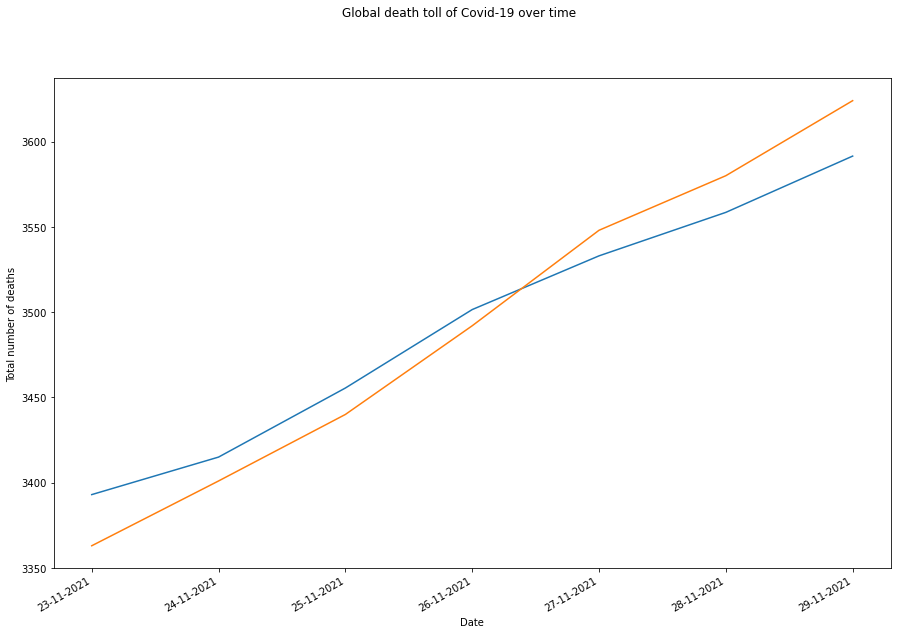

In [1250]:
df_sko_te1['date'] = df_sko_te1['date'].apply(dt.datetime.fromordinal)
plt.figure(figsize=(15,10))
plt.plot(df_sko_te1['date'], df_sko_te1['predict'])
plt.plot(df_sko_te1['date'], df_sko_te1['total_deaths'])
ax = plt.gca()
ax.set_xlabel("Date")
ax.set_ylabel("Total number of deaths")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gcf().autofmt_xdate()
plt.suptitle("Global death toll of Covid-19 over time")
plt.show()